<h1>光頭傑夫製作</h1><img src="https://rolqiw.bl.files.1drv.com/y4mYqkObWmQmdJFd8pab8t8m7d_mFhh3_YG63fiAnPaG6gjahHFt0n087pF97x1W2wemm7hd4ZdiPD2OxoPtqcCD_4-Jy-fojnt97kGGWR4Hnq0-9Ny61afd7WVHVTmF_9pcr45OFDFSwLKByeQU1q9TjwKk-HsNmWVsW1eGQ4Gi-9G4pQ5DYoTxswYJ5r5dLF-kKsA1InEyrqmV3kF5pm4WQ?width=658&height=584&cropmode=none" style='width:160px;margin:0'/>

# <span style="color:red ">為什麼這名字這麼...?Soup一鍋湯
-----
    因為網頁檔案就像外國人的濃湯一樣，什麼都有，大雜燴，只有好好整理一下，才可以變成一鍋好湯。
    
    Beautiful Soup, so rich and green,
    Waiting in a hot tureen!
    Who for such dainties would not stoop?
    Soup of the evening, beautiful Soup!
    
    美麗的湯，那麼豐富又綠色，
    在一個熱的碗裡等待！
    誰會為這樣的精緻而屈服？
    晚上的湯，美麗的湯！
                             --劉易斯·卡羅爾（Lewis Carroll）的一首詩
    
-----    
## [中文參考文檔](https://beautifulsoup.readthedocs.io/zh_CN/v4.4.0/#)

# <span style="color:red ">起手式

<h2 ><font color=red>先來安裝一下</font></h2>

In [ ]:
!pip install beautifulsoup4

<h2 ><font color=red>導入測試一下</font></h2>

In [ ]:
import bs4
print(bs4.__version__)

# <span style="color:red ">開始煮鍋Soup囉!

## <span style="color:orange ">煮湯基本功法

In [ ]:
import requests
import bs4
url='https://en.wikipedia.org/w/index.php?title=List_of_Game_of_Thrones_episodes&oldid=802553687'
html=requests.get(url)
obj=bs4.BeautifulSoup(html.text,'lxml')
print(type(obj))

In [ ]:
dir(obj)

In [ ]:
html.text

In [ ]:
obj

## <span style="color:orange ">解釋一下HTML parser
--------
    bs4.BeautifulSoup(html.text,'lxml')
    lxml是什麼?
--------
    你要解譯一個html，你就需要一個懂這個文件的工具。所以煮湯的時候，你要把這個工具掛進來。
    BeautifulSoup主要跟三種編譯器配合:
    *   “html.parser”- python內建，簡單好用，不用額外安裝
    *   “lxml”:速度夠快，如果發現導不進來，就安裝一下，pip install lxml
    *   “html5lib”:有點慢，但是如果你需要的解譯方式是跟瀏覽器一樣。
    
    除非你有特殊需求，要不然我們大部分都挑lxml，因為他對付不完整的網頁檔案比較厲害，譬如:它會自動幫你補洞。
-------
## [參考文檔](https://www.crummy.com/software/BeautifulSoup/bs4/doc.zh/#id13)

# <span style="color:red ">beautifulsoup4 可以做什麼?
-----
    簡單的說，你只要給beautifulsoup4一個html檔案，他就可以把它變成一個樹狀結構圖(DOM)

## <font color=red>bs4會幫你把那堆奇怪的碼，轉換成一個簡潔的DOM圖

---
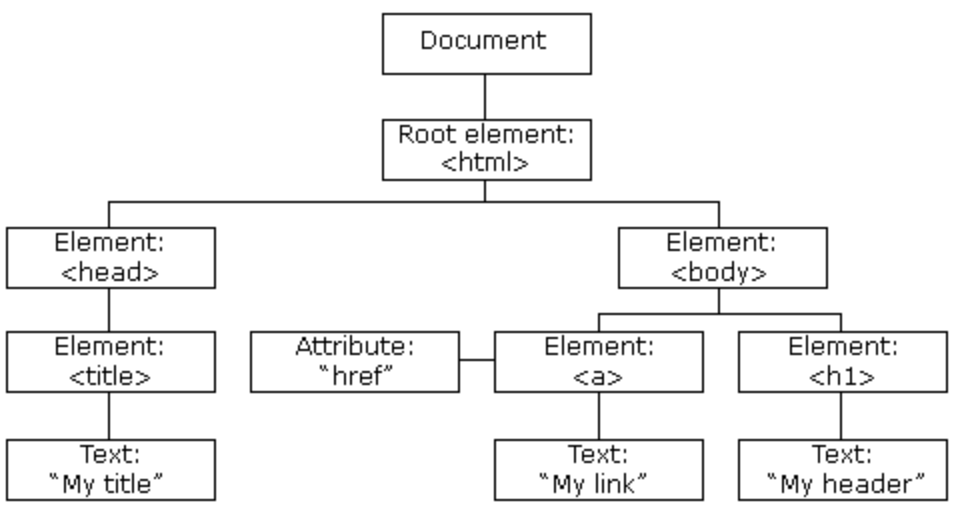

# <span style="color:red ">上面的樹形結構，每個節點都是一個Python的Object
-----

# <span style="color:red ">< Tag >物件
----
    基本上它就是Html裡面的標籤名。

In [ ]:
from bs4 import BeautifulSoup
soup = BeautifulSoup('<b class="boldest" value="Jeff">Extremely bold</b>')
#用.b就可以把這個<b>元素清出來
tag = soup.b
print(tag)
print(type(tag))

# <span style="color:red ">< Tag >有兩個重要的屬性
----
    
### <span style="color:red ">Name 

In [ ]:
#每個tag都有自己的名字
#前面那個元素就是b
tag.name

In [ ]:
#如果改變了tag的名稱，那將影響所有通過當前Beautiful Soup對像生成的HTML文檔
#b=>a
tag.name = "Jeff"
soup

### <span style="color:red ">Attributes

In [ ]:
#call each component's attribute
tag['class']

In [ ]:
tag.attrs

# <span style="color:red "> <測驗題>

---
麻煩幫我取得冰與火之歌的維基網頁title可以嗎?

### <span style="color:red "> <答案>

In [ ]:
import requests
import bs4
url='https://en.wikipedia.org/w/index.php?title=List_of_Game_of_Thrones_episodes&oldid=802553687'
html=requests.get(url)
obj=bs4.BeautifulSoup(html.text,'lxml')
obj.title

# <font color=red>去除標籤，只留文字-getText()和text的使用

# 透過下面結構，你就可以知道我們到底要拆解什麼
---
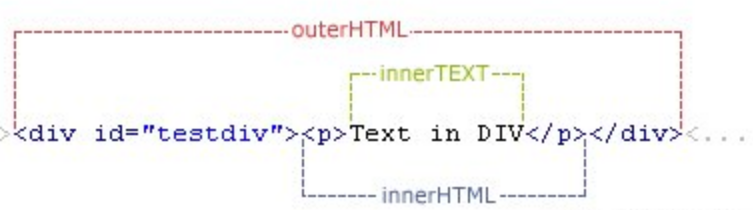

In [ ]:
#取文字的部分
obj.title.text

In [ ]:
#一樣可以取文字
obj.title.string

In [ ]:
#還是取得文字
obj.title.getText()

### 結果一樣，意義卻不一樣，先把題目寫完，告訴你

## <span style="color:red "> <測驗題>
---
麻煩幫我爬一下冰與火之歌的維基網頁的References1的文字可以嗎?
---
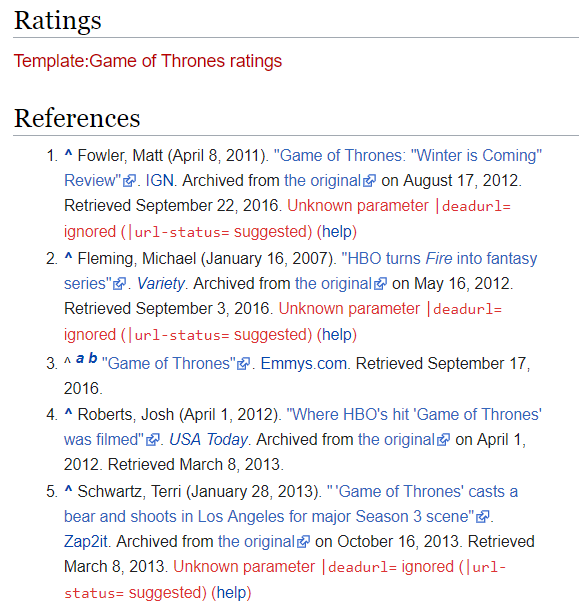

## <span style="color:red "> <答案>

In [ ]:
import requests
import bs4
url='https://en.wikipedia.org/w/index.php?title=List_of_Game_of_Thrones_episodes&oldid=802553687'
html=requests.get(url)
obj=bs4.BeautifulSoup(html.text,'lxml')
obj=obj.find(id="CITEREFFowler2011")
obj

In [ ]:
#取文字的部分
obj.text

In [ ]:
obj.string

In [ ]:
obj.getText()

在指定標籤裡面有子標籤，並且父標籤和子標籤各自包含一段文字時，兩者的返回結果，存在很大的差異:  

.string返回為空，因為文本數>=2，string不知道獲取哪一個  

.text返回的是，兩段文本的拼接。  

# <span style="color:red ">子節點
----
    一個tag可能包含多個string或其他的tag，這些都是這個tag的子節點

In [ ]:
import requests
import bs4
url='https://en.wikipedia.org/w/index.php?title=List_of_Game_of_Thrones_episodes&oldid=802553687'
html=requests.get(url)
obj=bs4.BeautifulSoup(html.text,'lxml')

# <font color=red>.contents 和 .children
----
    tag的直接子節點

In [ ]:
obj.ul.contents 

In [ ]:
obj.ul.children

In [ ]:
#obj.ul.children 讓你可以對子節點做一個for迴圈
for child in obj.ul.children:
    print(child)
    print('---------------------------------------')

# <font color=red>.descendants
----
    tag的所有子孫節點都含括進來

In [ ]:
for child in obj.ul.descendants:
    print(child)
    print('---------------------------------------')

# <span style="color:red ">父節點
----
    tag A被包含在tag B中，tag B就稱為父節點。

In [ ]:
#.parent
obj.title.parent

In [ ]:
#.parents
#元素的所有父輩節點
for parent in obj.ul.parents:
    print(parent)
    print('---------------------------------------')

# <span style="color:red ">兄弟節點

In [1]:
import bs4
sibling_soup = bs4.BeautifulSoup("<a><b>text1</b><c>text2</c></b></a>")
#prettify()函數將soup這個物件美化，照層級排一下
print(sibling_soup.prettify())

<html>
 <body>
  <a>
   <b>
    text1
   </b>
   <c>
    text2
   </c>
  </a>
 </body>
</html>


In [2]:
import bs4
sibling_soup = bs4.BeautifulSoup("<a><b>text1</b><c>text2</c></b></a>")
#跟上面對照一下
print(sibling_soup)

<html><body><a><b>text1</b><c>text2</c></a></body></html>


# <span style="color:red ">.next_sibling 和 .previous_sibling

In [ ]:
#下一個兄弟
sibling_soup.b.next_sibling

In [ ]:
#上一個兄弟
sibling_soup.c.previous_sibling

# <span style="color:red ">利用HTML tree的搜尋方式-find()的用法
----
    上面所述的元素尋找方式，是把完成的階層路徑寫出來，那如果我寫不出來怎麼辦????

## <span style="color:red ">傳回第一個符合的tag-find()的用法

----

### find(name, attrs, recursive, string, **keywords)

In [ ]:
#傳回找到的第一個<h1>
import requests
import bs4
url='https://en.wikipedia.org/w/index.php?title=List_of_Game_of_Thrones_episodes&oldid=802553687'
html=requests.get(url)
obj=bs4.BeautifulSoup(html.text,'lxml')
obj.find('h1')

In [ ]:
dir(obj)

In [ ]:
#如果你要尋找的元素是有屬性值的...
obj.find('div',{'id':'p-logo'})

In [ ]:
#你不知道元素，但是想要把有帶某個屬性的東西挑出來....
obj.find(id="p-logo")

## <span style="color:red ">傳回所有符合的tag-find_all()的用法
-------

## find_all(name, attrs, recursive, string, limit, **keywords)

-----

   不喜歡下底線的寫法，那BeautifulSoup也提供“camelCaps”寫法
   
##   findAll和find_all效果一樣

In [ ]:
obj.find_all('a')

In [ ]:
#跟上面是同一句話
obj.findAll('a')

In [ ]:
#一次有多個元素要一次找出來，請放在list裡面
for found in obj.find_all(['h1', 'h2']):
    print(found)
    print('-------------------------------')

In [ ]:
#只要class符合就挑出來
#你有注意到class_嗎?? 後面解釋...
obj.find_all(class_="noprint")

In [ ]:
#一次篩選多個property
obj.find_all(id="siteNotice",class_="mw-body-content")

In [ ]:
#我只要某些元素，所以用['div', 'span']
#property我們會用dictionary的方式來表示
#你有注意到class嗎??不要覺得我怪怪的
obj.find_all(['div', 'span'],{'class':"noprint"})

In [ ]:
#只要有id屬性的元素，我都要
for item in  obj.find_all(id=True):
    print(item)
    print('------------------------------')

In [ ]:
#整篇文章就兩個地方有"背景世界"
obj.find_all(string="背景世界")

In [ ]:
#有帶string的，我都要
obj.find_all(string=True)

## <span style="color:red ">讓我們聊聊這兩個方法的參數
### [參考說明](https://blog.csdn.net/depers15/article/details/51934210)
----
```
* name--
    你想要找的標籤名字，你可以放一個'h1'，也可以放list['h1', 'h2'],也可以不寫(就是選全部的意思)

* string--
    找元素文字內容符合的，就會挑出來
 
* limit--
    find_all獨有，定義你要找到幾個元素，就可以收工。
    find 其實就是 find_all把limit設成1的特別版
    
* recursive--
    這是一個布林值，決定你要搜尋的深度
    default True  --find and find_all method會找到最深層，兒子、孫子、孫子的兒子都不放過。
            False --只找直接兒子(下一層而已)
    看下面例子

* attrs--
    基本上這裡會塞一個python的dictionary，描述你要的欄位和內容值，譬如:{'id': 'p-logo'}，那就會把屬性符合的元素挑出來。
    (dictionary的條件要完全符合，才會挑出來，可以試試{'id': 'p-logo','role':'super'})
 
* **keywords-
    這就是attrs的簡化版本，比較好讀，就這樣。
    等於我不寫dictionary，直接寫參數。
    find(id='myid')  就是   find({'id': 'myid'})
    
    特別注意，因為class是一個保留字，所以
    find(class='myclass') error error 
    要寫
    find(class_='myclass')
    
    還有name也不可以用在**keywords裡面，因為find_all的第一個參數就叫name。
    而且沒有name_可以用，請一定要用attrs
    
```

## <span style="color:red ">recursive是什麼意思-要不要遞歸
-------
    如果我只想找直接的下一代...

In [ ]:
objTag = obj.find('div',{'id':'content'}).find_all('div', recursive=False)
for data in objTag:                     
    print(data)
    print('------------------------------')

In [ ]:
objTag = obj.find('div',{'id':'content'}).find_all('div')
for data in objTag:                     
    print(data)
    print('------------------------------')

## <span style="color:red ">傳回所找尋所有符合的標籤-find_all()的用法-透過limit限制我們要找的個數

In [ ]:
objTag = obj.find_all('h3', limit=2)
for data in objTag:                     
    print(data.text)

## <span style="color:red ">**keywords的用法-html屬性搜尋

In [ ]:
target=obj.find(id="s_name")
target

## <span style="color:red ">name和**keywords的合併搜尋

In [ ]:
#我們有那些h3
obj.find_all('div')

In [ ]:
obj.find_all('div',class_="noprint")

In [ ]:
#針對class這個屬性，簡單寫也可以
obj.find_all('div',"noprint")

# <span style="color:red ">前面我們說過，如果你找到你要的元素，你就可以調閱他的屬性

In [ ]:
target=obj.find('div',class_="noprint")
target['id']

# <span style="color:red "> <測驗題>

---
麻煩幫我爬一下下面網址

In [ ]:
import requests
from bs4 import BeautifulSoup
url = 'https://en.wikipedia.org/w/index.php?title=List_of_Game_of_Thrones_episodes&oldid=802553687'




#幫我找第一個h1 tag


#輸出h1的name


#輸出h1的內容


#輸出h1的id


#比較一下h1的text和get_text()和.contents差異


#請幫我找出reference的前五篇，把內容印出來


### <span style="color:red "> <答案>

In [3]:
import requests
from bs4 import BeautifulSoup

url = 'https://en.wikipedia.org/w/index.php?title=List_of_Game_of_Thrones_episodes&oldid=802553687'
r = requests.get(url)
html_contents = r.text
html_soup = BeautifulSoup(html_contents, 'lxml')

#幫我找第一個h1 tag
first_h1 = html_soup.find('h1')

#輸出h1的name
print('輸出h1的name:{}'.format(first_h1.name))
print('------------------------------')
#輸出h1的內容
print(first_h1.contents)
print('------------------------------')
#輸出h1的id
print(first_h1['id'])
print('------------------------------')

#比較一下h1的text和get_text()和.contents差異
print(first_h1.text) 
print('------------------------------')
print(first_h1.get_text())
print('------------------------------')
print(first_h1.contents)
print('------------------------------')


#請幫我找出reference的前五篇，把內容印出來
cites = html_soup.find_all('cite', class_='citation', limit=5)
for citation in cites:
    print(citation.get_text())
    link = citation.find('a')
    print(link.get('href'))
    print()

輸出h1的name:h1
------------------------------
['List of ', <i>Game of Thrones</i>, ' episodes']
------------------------------
firstHeading
------------------------------
List of Game of Thrones episodes
------------------------------
List of Game of Thrones episodes
------------------------------
['List of ', <i>Game of Thrones</i>, ' episodes']
------------------------------
Fowler, Matt (April 8, 2011). "Game of Thrones: "Winter is Coming" Review". IGN. Archived from the original on August 17, 2012. Retrieved September 22, 2016.
https://web.archive.org/web/20120817073932/http://tv.ign.com/articles/116/1160215p1.html

Fleming, Michael (January 16, 2007). "HBO turns Fire into fantasy series". Variety. Archived from the original on May 16, 2012. Retrieved September 3, 2016.
https://web.archive.org/web/20120516224747/http://www.variety.com/article/VR1117957532?refCatId=14

"Game of Thrones". Emmys.com. Retrieved September 17, 2016.
http://www.emmys.com/shows/game-thrones

Roberts, Josh (A

# <span style="color:red "> <測驗題>加強版

---
在冰與火之歌的這個網頁裡面，有Episodes table。請幫我把這些table讀取出來，列印如下:
----
```
{'No.overall': '1', 'No. inseason': '1', 'Title': '"Winter Is Coming"', 'Directed by': 'Tim Van Patten', 'Written by': 'David Benioff & D. B. Weiss', 'Original air date\u200a[20]': 'April\xa017,\xa02011\xa0(2011-04-17)', 'U.S. viewers(millions)': '2.22[21]'}
    
{'No.overall': '2', 'No. inseason': '2', 'Title': '"The Kingsroad"', 'Directed by': 'Tim Van Patten', 'Written by': 'David Benioff & D. B. Weiss', 'Original air date\u200a[20]': 'April\xa024,\xa02011\xa0(2011-04-24)', 'U.S. viewers(millions)': '2.20[22]'}
    
{'No.overall': '3', 'No. inseason': '3', 'Title': '"Lord Snow"', 'Directed by': 'Brian Kirk', 'Written by': 'David Benioff & D. B. Weiss', 'Original air date\u200a[20]': 'May\xa01,\xa02011\xa0(2011-05-01)', 'U.S. viewers(millions)': '2.44[23]'}
    
{'No.overall': '4', 'No. inseason': '4', 'Title': '"Cripples, Bastards, and Broken Things"', 'Directed by': 'Brian Kirk', 'Written by': 'Bryan Cogman', 'Original air date\u200a[20]': 'May\xa08,\xa02011\xa0(2011-05-08)', 'U.S. viewers(millions)': '2.45[24]'} 
 .
 .
 .
 .
 .
```

In [ ]:
import requests
from bs4 import BeautifulSoup
url = 'https://en.wikipedia.org/w/index.php?title=List_of_Game_of_Thrones_episodes&oldid=802553687'
#請繼續寫下去

### <span style="color:red "> <答案>

In [ ]:
import requests
from bs4 import BeautifulSoup

url = 'https://en.wikipedia.org/w/index.php?title=List_of_Game_of_Thrones_episodes&oldid=802553687'
r = requests.get(url)
html_soup = BeautifulSoup(r.content, 'lxml')

# We'll use a list to store our episode list
episodes = []
ep_tables = html_soup.find_all('table', class_='wikiepisodetable')
for table in ep_tables:
    headers = []
    rows = table.find_all('tr')
   
    # 為了確認資料的欄位名，所以我們要抓欄位名
    # 每一張表的第一個tr就是欄位名row
    # 進去第一個tr以後，擷取每一個th，就可以知道欄位名
    for header in table.find('tr').find_all('th'):
        headers.append(header.text)
    
    #因為第一個tr是欄位名，所以第一個放棄
    #後面的就是我們要的資料
    for row in table.find_all('tr')[1:]:
        values = []
        # And get the column cells, the first one being inside a th-tag
        #進來以後，你會看到每一個tr裡面，第一格是th，剩下是td，所以我全都要
        for col in row.find_all(['th','td']):
            values.append(col.text)
        #如果有抓到值，我們要用dictionary的方式，把資料轉成我們更好看的格式
        if values:
            episode_dict = {headers[i]: values[i] for i in range(len(values))}
            episodes.append(episode_dict)
# Show the results
for episode in episodes:
    print(episode)

### <span style="color:red "> <進階大補湯>

### <span style="color:red "> find可以和正則表達式一起合作

In [ ]:
#和正則表達式合體
import re
import requests
import bs4
url='https://en.wikipedia.org/w/index.php?title=List_of_Game_of_Thrones_episodes&oldid=802553687'
html=requests.get(url)
obj=bs4.BeautifulSoup(html.text,'lxml')
for i in obj.find_all(re.compile("^t")):
    print(i)
    print('----------------------------------')

# <span style="color:red "> <測驗題>

---
麻煩幫我把這個網頁裡面的照片元素的src值爬回來可以嗎?

In [ ]:
#http://www.pythonscraping.com/pages/page3.html


# <span style="color:red "> <答案>

In [ ]:
import requests
from bs4 import BeautifulSoup
import re

html = requests.get('http://www.pythonscraping.com/pages/page3.html')
bs = BeautifulSoup(html.content, 'lxml')
images = bs.find_all('img', {'src':re.compile(r'../img/gifts/img.*.jpg')})
for image in images:
    print(image['src'])

In [ ]:
import requests
from bs4 import BeautifulSoup
import re

html = requests.get('http://www.pythonscraping.com/pages/page3.html')
bs = BeautifulSoup(html.content, 'lxml')
#如果你不寫raw string，你就要用下面的寫法
images = bs.find_all('img', {'src':re.compile('\.\.\/img\/gifts/img.*\.jpg')})
for image in images:
    print(image['src'])

# <span style="color:red "> find也可以和function合作

In [ ]:
#把function放到find裡面，就會把一個一個component塞進function裡面
#只要wikitable 不要wikiepisodetable，符合就會把component挑出來
def has_classa_but_not_classb(tag):
    #因為有的元素是沒有class的，那後面的 in test就會error，所以指定，none就給一個空的[]，讓cls不會是一個空變數
    cls = tag.get('class', [])
    return 'wikitable' in cls and not 'wikiepisodetable' in cls
obj.find(has_classa_but_not_classb)

In [ ]:
#如果上面的碼看不太懂，可以print出來看看
def has_classa_but_not_classb(tag):
    cls = tag.get('class', [])
    print(cls)
    print('wikitable' in cls and not 'wikiepisodetable' in cls)
    return 'wikitable' in cls and not 'wikiepisodetable' in cls
obj.find(has_classa_but_not_classb)

# <span style="color:red "> 可以接function，當然可以接lambda

In [ ]:
obj.find_all(lambda tag: tag.get_text() =='Season 1 (2011)')

### <span style="color:red "><找爸爸> find_parent and find_parents
--------
    一般來說，BS都是往下找，
    但是如果你需要往上找，請用"找父母"專線
    find_parent-找直屬爸爸
    find_parents-找爸爸、找爸爸的爸爸、找爸爸的爸爸......

In [ ]:
#參考冰與火網頁
obj.find('h1',{'class':"firstHeading"}).find('i').find_parent().find_parent()

In [ ]:
#參考冰與火網頁
obj.find('h1',{'class':"firstHeading"}).find('i').find_parents()

### <span style="color:red "> <找兄弟>
--------
    find_next_sibling
    find_next_siblings
    find_previous_sibling
    find_previous_siblings

In [ ]:
from bs4 import BeautifulSoup
sibling_soup = BeautifulSoup("<a><b>text1</b><c>text2</c></b></a>")
print(sibling_soup.prettify())

In [ ]:
sibling_soup.b.next_sibling

In [ ]:
sibling_soup.c.next_sibling

In [ ]:
sibling_soup.c.previous_sibling

In [ ]:
sibling_soup.b.previous_sibling

# <span style="color:red "> find相關的方法都是用搜尋HTML tree的方式
--------
    但是不要忘了，我們還有一個CSS selector的搜尋方式

<h2 ><font color=red>select的用法</font></h2>

---
select 的功能跟find和find_all 一樣用來選取特定的標籤，它的選取規則依賴於css，我們把它叫做css選擇器，如果之前有接觸過jquery ，可以發現select的選取規則和jquery有點像。

### 通過標籤名查詢

In [ ]:
obj.select('p')

In [ ]:
# Find all <a> tags
obj.select('a')

### 通過類名和id進行查詢
---
在進行過濾時類名前加點，id名前加 #

In [ ]:
obj.select('.title_basic') 

In [ ]:
obj.select('#s_name')  

In [ ]:
# Find <table> tags with both classa and classb CSS classes
obj.select('table.wikiepisodetable.wikitable')

### 通過屬性查詢
---

如果不是id或者是類名，是不是就不能進行過濾了？如果可以，該如何來表達，

In [ ]:
#href是一個屬性，就直接寫
obj.select("[href='/acg/16901?pnode=header_mega_basic_2014230080709']")  

In [ ]:
# Find <a> tags with an href attribute starting with http://example.com/
obj.select('a[href^="http://example.com/"]')

### 組合查詢


In [ ]:
obj.select('li .title_basic')

In [ ]:
# Find <li> tags which are children of <ul> tags with class lst
obj.select('ul.lst > li')